# <font size='10' color='#1ABC9C'>  Testing The Assumptions </font>

### Statistical Summary of the standardized , feature engineered data after the handling of the outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline 
## When using the 'inline' backend, 
## your matplotlib graphs will be included in your notebook, next to the code.
import seaborn as sns
from scipy.stats import shapiro
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv('dataset_cleaned.csv')
dataset.shape

(4506, 16)

In [3]:
corr = dataset.corr()

corr.style.background_gradient(cmap='coolwarm')

,age,yrsed,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue,2,3,4,5
age,1.000000,-0.094713,0.712276,0.128332,0.115701,0.144039,-0.392945,0.415094,-0.019767,0.821501,-0.022097,0.207176,-0.060433,-0.028552,-0.029012,-0.009924
yrsed,-0.094713,1.000000,-0.197451,0.197983,0.117092,0.134499,0.113420,-0.091076,0.044639,-0.057705,0.008397,0.177757,-0.302766,0.142505,0.540786,0.508054
yrsempl,0.712276,-0.197451,1.000000,0.311253,0.218660,0.245371,-0.363322,0.503632,0.024256,0.611117,0.006647,0.368083,0.019866,-0.045318,-0.094877,-0.077902
income,0.128332,0.197983,0.311253,1.000000,0.570192,0.645215,-0.033584,0.250681,0.156806,0.196321,0.056096,0.889347,-0.103246,0.022602,0.114828,0.123884
creddebt,0.115701,0.117092,0.218660,0.570192,1.000000,0.600492,0.160191,0.180391,0.070693,0.135896,0.022499,0.530280,-0.031156,-0.005258,0.075184,0.060650
othdebt,0.144039,0.134499,0.245371,0.645215,0.600492,1.000000,0.094991,0.197541,0.093721,0.176155,0.041540,0.604885,-0.068500,-0.004209,0.094432,0.082026
default,-0.392945,0.113420,-0.363322,-0.033584,0.160191,0.094991,1.000000,-0.203444,-0.027361,-0.357760,0.013890,-0.070019,-0.001450,0.010645,0.064227,0.040252
jobsat,0.415094,-0.091076,0.503632,0.250681,0.180391,0.197541,-0.203444,1.000000,0.022143,0.350661,0.013886,0.272611,-0.004409,-0.011538,-0.039797,-0.032055
homeown,-0.019767,0.044639,0.024256,0.156806,0.070693,0.093721,-0.027361,0.022143,1.000000,0.137432,0.017491,0.140499,-0.023626,0.023809,0.036212,0.001901
address,0.821501,-0.057705,0.611117,0.196321,0.135896,0.176155,-0.357760,0.350661,0.137432,1.000000,-0.000072,0.252117,-0.051968,-0.023364,-0.008046,-0.000447


Finding Correlation between each Independent Variable




In [4]:
# getting a list of independent features
list_Indpndt_features = [feature for feature in dataset.columns if 'income' not in feature ]
list_Indpndt_features



['age',
 'yrsed',
 'yrsempl',
 'creddebt',
 'othdebt',
 'default',
 'jobsat',
 'homeown',
 'address',
 'cars',
 'carvalue',
 '2',
 '3',
 '4',
 '5']

In [5]:
for i in range (0,len(list_Indpndt_features)):
    for j in range (i+1 , len(list_Indpndt_features)):
        correlation  = dataset[list_Indpndt_features[i]].corr(dataset[list_Indpndt_features[j]])
        if (correlation>=0.5):
            print( list_Indpndt_features[i],' & ', list_Indpndt_features[j] , " = " , correlation)
        


age  &  yrsempl  =  0.7122762051991901
age  &  address  =  0.8215006220868258
yrsed  &  4  =  0.5407862682826589
yrsed  &  5  =  0.5080539369562193
yrsempl  &  jobsat  =  0.5036322375274156
yrsempl  &  address  =  0.6111167086766641
creddebt  &  othdebt  =  0.6004922445818441
creddebt  &  carvalue  =  0.5302796415475242
othdebt  &  carvalue  =  0.6048845609610074


## Assumption 1 :- Assumptions of Dependent and Independent Features
####        Null Hypothesis 1 : - The Independent features are Highly corelated with each other


we consider , correlation >=0.5 as high, therefore for those feature we'll fail to reject the Null hypothesis(HO)

age  &  yrsempl  =  0.7122762051991901

age  &  address  =  0.8215006220868258

yrsed  &  4  =  0.5407862682826589

yrsed  &  5  =  0.5080539369562193

yrsempl  &  jobsat  =  0.5036322375274156

yrsempl  &  address  =  0.6111167086766641

creddebt  &  othdebt  =  0.6004922445818441

creddebt  &  carvalue  =  0.5302796415475242

othdebt  &  carvalue  =  0.6048845609610074


## 
####        Null Hypothesis 2 :-  The Independent features are Highly Multi-Correleted
To verify this we'll  check VIF for each feature , if VIF >10 , therefore that feature is highly multicorelated

In [6]:
## Reference : -https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] =dataset[list_Indpndt_features].columns
  
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset[list_Indpndt_features].values, i)
                          for i in range(len(dataset[list_Indpndt_features].columns))]
  
print(vif_data)

     feature        VIF
0        age  32.790978
1      yrsed  57.512400
2    yrsempl   8.628853
3   creddebt   6.511785
4    othdebt   8.012472
5    default   1.718354
6     jobsat   7.638147
7    homeown   2.901169
8    address   9.093785
9       cars   5.111536
10  carvalue  12.639053
11         2   4.474943
12         3   4.731309
13         4   7.287184
14         5   4.123552


##### age ,yrsed and carvalue have high multi colinearity , thus for these features we fail to reject Null Hypothesis 2

Now we'll check correlation of Multicorrelated variables with Dependent Variable , and drop those have least correlation , they won't be useful for prediction.

In [7]:
target_features= [feature for feature in dataset.columns if 'yrsed' in feature or 'age' in feature or'carvalue' in feature ]
for i in range (0,len(target_features)):
        correlation  = dataset['income'].corr(dataset[target_features[i]])
        print( 'income' ,' & ', target_features[i] , " = " , correlation)
        

income  &  age  =  0.12833155470874583
income  &  yrsed  =  0.19798343138251495
income  &  carvalue  =  0.8893470860662386


##### We can drop age and yrsed as it has least co-relation with income and wont be much helpful in prediction the same 

In [8]:
## droping edcat. edcat2, edcat3 and  edcat4 
dataset=dataset.drop(['age'],axis=1)
dataset=dataset.drop(['yrsed'],axis=1)

dataset.head()

,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue,2,3,4,5
0,4.0,2.252303,0.387607,1.294482,0,4,1,22,1,11.3,0,0,0,0
1,15.0,2.029856,0.387607,0.982326,0,3,1,28,1,11.3,0,0,0,0
2,7.0,1.836011,0.387607,0.982326,0,5,0,21,1,11.3,0,0,0,0
3,15.0,2.214519,0.387607,0.982326,0,4,0,11,1,11.3,0,0,0,0
4,8.0,2.704247,0.387607,0.982326,0,3,0,11,1,22.1,0,0,0,0


#### Null Hypothesis 3  : - Multivariate normality exists 
We will use :
    The Henze-Zirkler Multivariate Normality Test determines whether or not a group of variables follows a multivariate normal distribution. The null and alternative hypotheses for the test are as follows:

H0 (null): The variables follow a multivariate normal distribution.

Ha (alternative): The variables do not follow a multivariate normal distribution.

reference : -https://www.statology.org/multivariate-normality-test-python/





In [9]:
from pingouin import multivariate_normality
multivariate_normality(dataset , alpha =0.05)


HZResults(hz=3.2398029484367545, pval=0.0, normal=False)

#### p-value is less than the alpha =0.05 , thus we to reject the H0

also confirmed the test by verifying Mahalonobis distance in SPSS.

#### Null Hypothesis 4 :- Independent Variables are normally Distributed

In [10]:
'''
list_feature_forBOXCOX = [feature for feature in X_train.columns if 'homeown' not in feature
                          and'edcat5' not in feature
                         and 'default' not in feature
                          and 'jobsat' not in feature]

list_feature_forBOXCOX


### Apply box-Cox Transformation.

 # to make age normalwe will apply box-cox transformation
## Reference :-https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd
from scipy import stats    

#transform the data using box-cox
for feature in list_feature_forBOXCOX:
    X_train[feature], lambd = stats.boxcox(X_train[feature])
    #plot the distribution curve and QQ-plot for transformed data
    sns.distplot(X_train[feature])
    plt.show()
    fig = sm.qqplot(X_train[feature],line='s')
    plt.show()
'''

"\nlist_feature_forBOXCOX = [feature for feature in X_train.columns if 'homeown' not in feature\n                          and'edcat5' not in feature\n                         and 'default' not in feature\n                          and 'jobsat' not in feature]\n\nlist_feature_forBOXCOX\n\n\n### Apply box-Cox Transformation.\n\n # to make age normalwe will apply box-cox transformation\n## Reference :-https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd\nfrom scipy import stats    \n\n#transform the data using box-cox\nfor feature in list_feature_forBOXCOX:\n    X_train[feature], lambd = stats.boxcox(X_train[feature])\n    #plot the distribution curve and QQ-plot for transformed data\n    sns.distplot(X_train[feature])\n    plt.show()\n    fig = sm.qqplot(X_train[feature],line='s')\n    plt.show()\n"

###### Checking the normality of all variables

In [11]:


for feature in dataset.columns:
    stat,p = shapiro(dataset[feature])
    print("\n For ",feature)
    if (p>0.05):
        print('we assume the distribution of our variable is normal/gaussian as P-value = ',p)
    else:
        print('we assume the distribution of our variable is NOT normal/gaussian as P-Value = ',p)


 For  yrsempl
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  0.0

 For  income
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  2.2897458928916592e-10

 For  creddebt
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  0.0

 For  othdebt
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  0.0

 For  default
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  0.0

 For  jobsat
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  0.0

 For  homeown
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  0.0

 For  address
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  3.0689907732101035e-39

 For  cars
we assume the distribution of our variable is NOT normal/gaussian as P-Value =  0.0

 For  carvalue
we assume the distribution of our variable is NOT normal/ga

#### Null Hypothesis 5 :- There is Homoscedacity among the data 



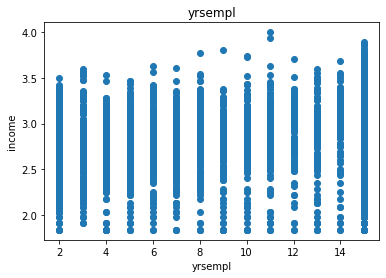

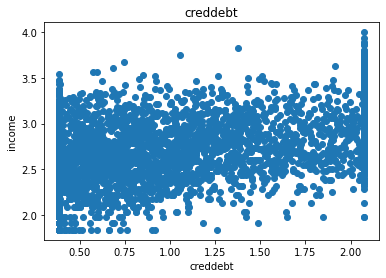

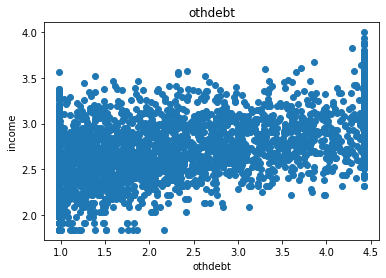

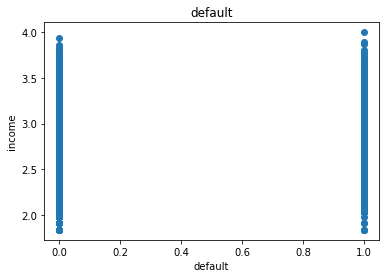

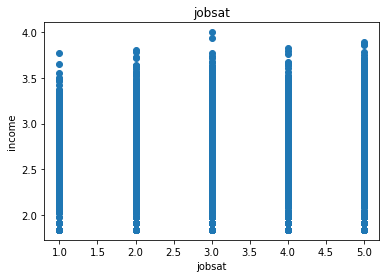

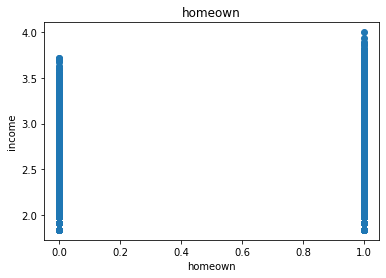

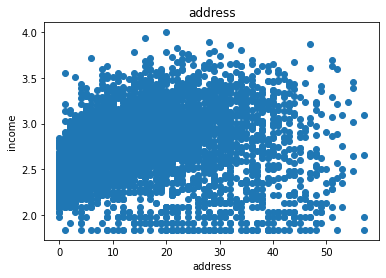

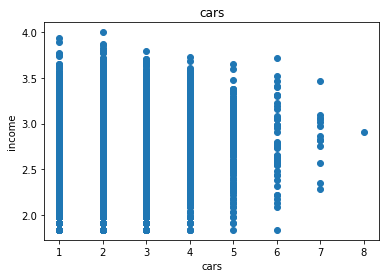

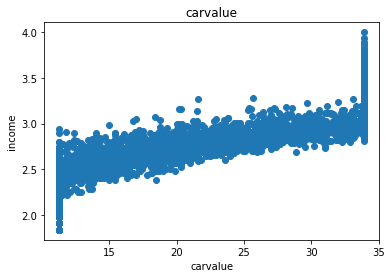

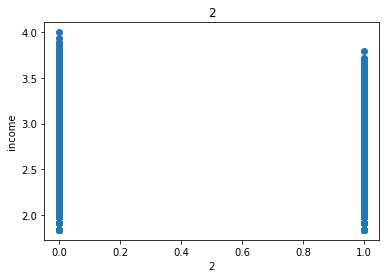

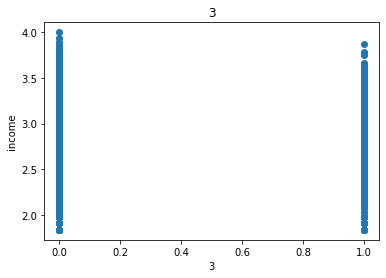

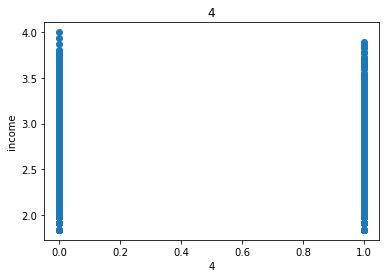

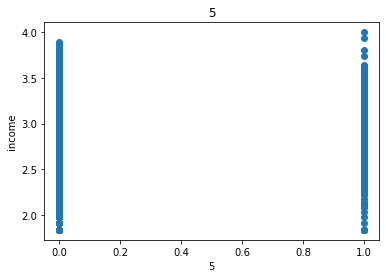

In [12]:
### we are majorly looking at continuous variables only, ignore categorical features
list_columns = [feature for feature in dataset.columns if 'income' not in feature]

for column in list_columns:
    plt.scatter(dataset[column],dataset['income'])
    plt.xlabel(column)
    plt.ylabel('income')
    plt.title(column)
    plt.show()

#### No models show signs of Hetrosedacity , hence we don't have sufficient evidence to reject the null hypothesis 5

# Now We are ready to move to Feature Selection.

In [13]:
dataset.to_csv('dataset_cleaned_assumption_OK.csv',index=False)